In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
r_data=pd.read_csv("Churn.csv")
r_data

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

In [3]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [4]:
r_data.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [5]:
r_data['eve.mins']=pd.to_numeric(r_data['eve.mins'],errors='coerce')
r_data['day.charge']=pd.to_numeric(r_data['day.charge'],errors='coerce')

In [6]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
r_data.isna().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [8]:
r_data=r_data.dropna()
r_data

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
0           110       45.07     197.4         99       16.78       244.7   
1           123       27.47     195.5        103       16.62       254.4   
2           114       41.38     121.2        110       10.30       162.6   
3            71       50.90      61.9         88        5.26       196.9   
4           113       28.34     148.3        122       12.61       186.9   
...         ...         ...       ...        ...         ...         ...   
4995        127       40.07     223.0        126       18.96       297.5   
4996         90       31.31     256.8         73       21.83       213.6   
4997         89       23.90     172.8        128       14.69       212.4   
4998         67       32.10     171.7         92       14.59       224.4   
4999        102       22.00     267.1        104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[4969 rows x 21 columns]

In [9]:
r_data.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  4969.000000     4969.000000     4969.000000  4969.000000  4969.000000   
mean   2508.523244      100.206681        7.754880    10.264198     4.433085   
std    1439.760538       39.695476       13.545738     2.761996     2.459495   
min       1.000000        1.000000        0.000000     0.000000     0.000000   
25%    1265.000000       73.000000        0.000000     8.500000     3.000000   
50%    2512.000000      100.000000        0.000000    10.300000     4.000000   
75%    3754.000000      127.000000       17.000000    12.000000     6.000000   
max    5000.000000      243.000000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  4969.000000  4969.000000  4969.000000  4969.000000  4969.000000   
mean      2.771851   180.306178   100.021936    30.652604   200.617368   
std       0.745672    53.931206    19.835965     9.168275    50.550590   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    24.430000   166.400000   
50%       2.780000   180.100000   100.000000    30.620000   201.000000   
75%       3.240000   216.200000   113.000000    36.750000   234.100000   
max       5.400000   351.500000   165.000000    59.760000   363.700000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  4969.000000  4969.000000  4969.000000  4969.000000   4969.000000   
mean    100.174884    17.052695   200.434675    99.954518      9.019670   
std      19.833572     4.296784    50.528158    19.959015      2.273776   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    14.140000   167.100000    87.000000      7.520000   
50%     100.000000    17.090000   200.400000   100.000000      9.020000   
75%     113.000000    19.900000   234.700000   113.000000     10.560000   
max     170.000000    30.910000   395.000000   175.000000     17.770000   

       customer.calls  
count     4969.000000  
mean         1.571946  
std          1.307458  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

<AxesSubplot:>

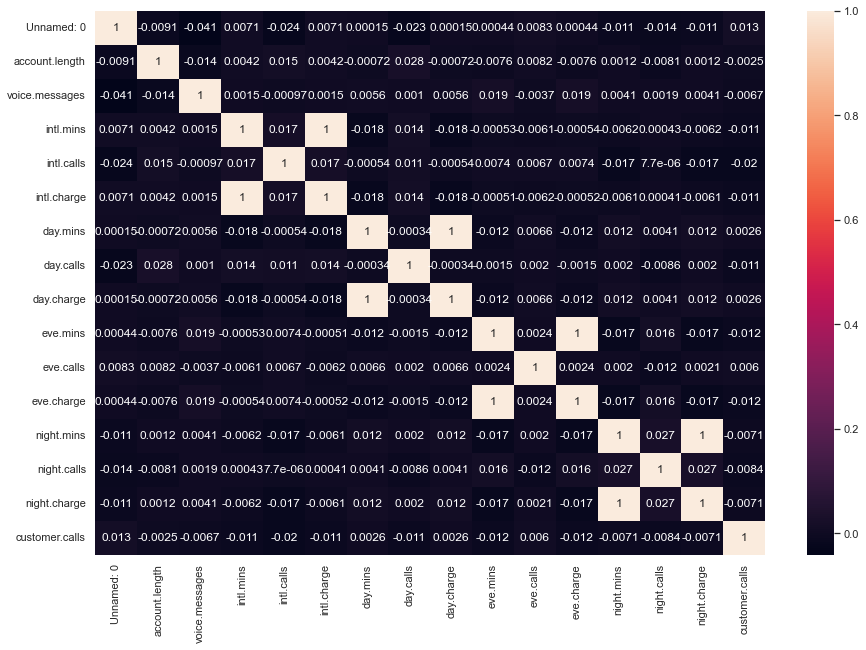

In [10]:
sn.set(rc={'figure.figsize':(15,10)})
sn.heatmap(r_data.corr(),annot=True)

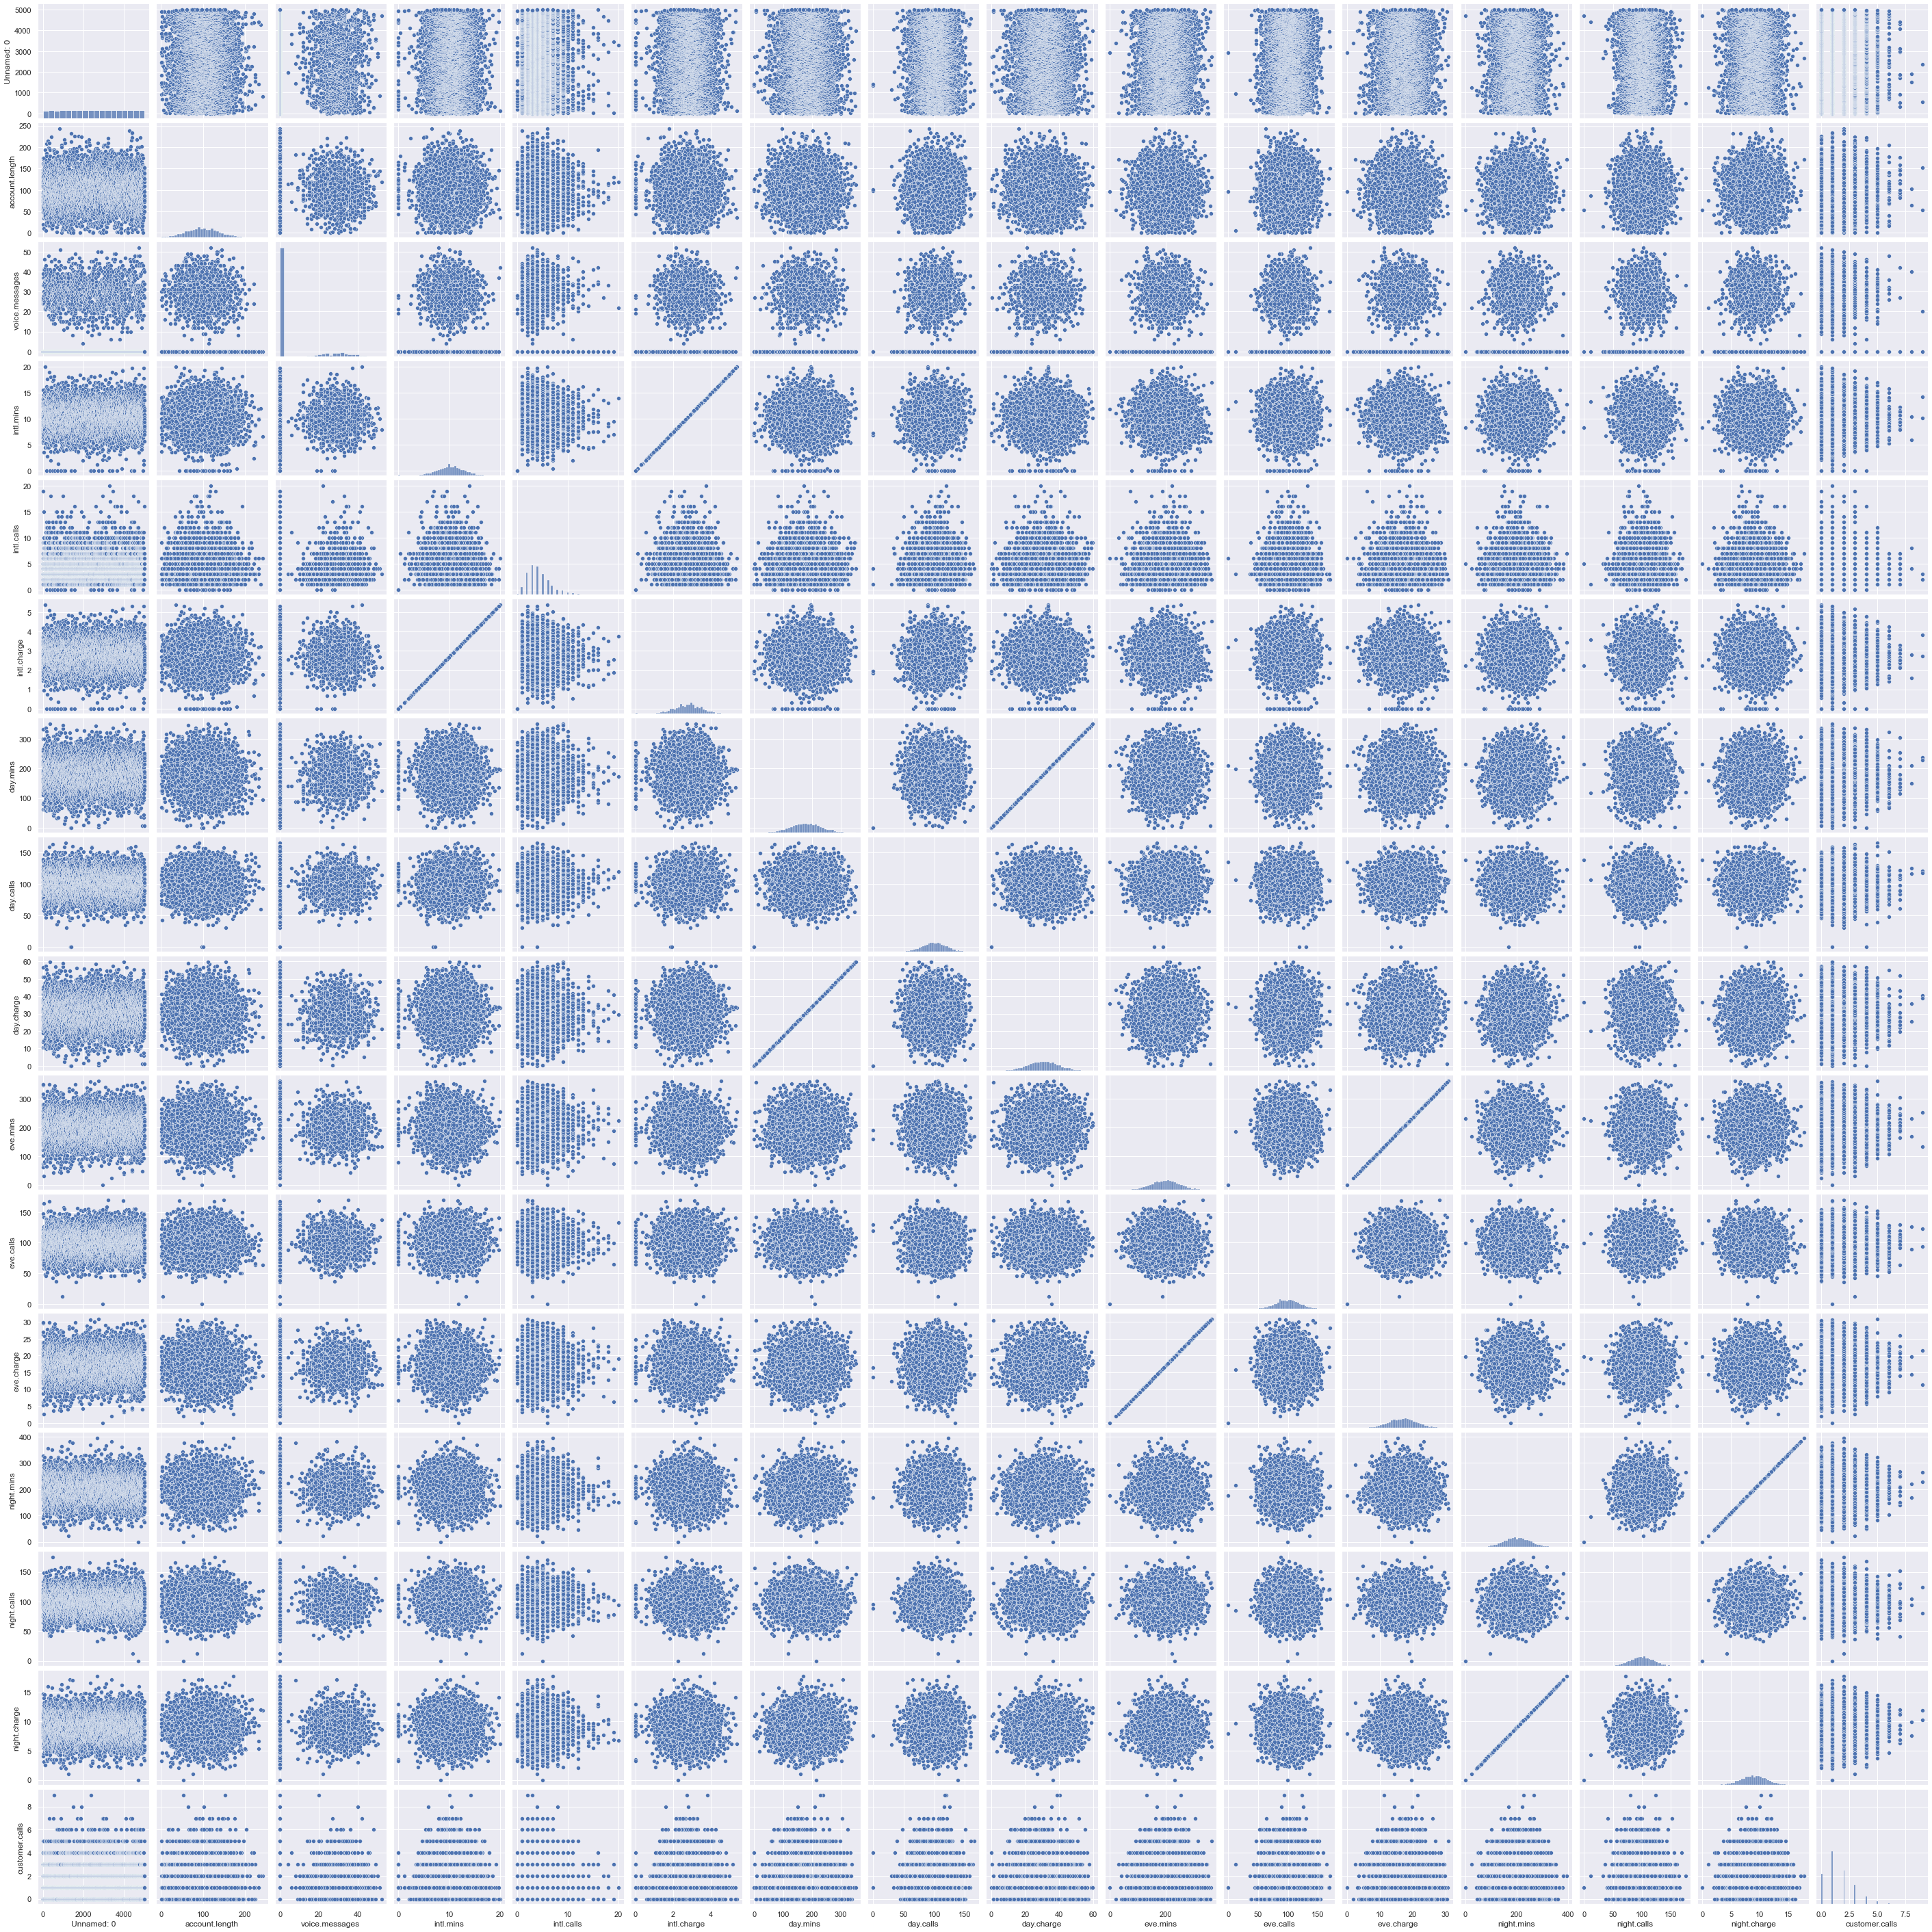

In [11]:
sn.set_style(style='darkgrid')
sn.pairplot(r_data)

In [12]:
r_data['churn'].value_counts()

no     4264
yes     705
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

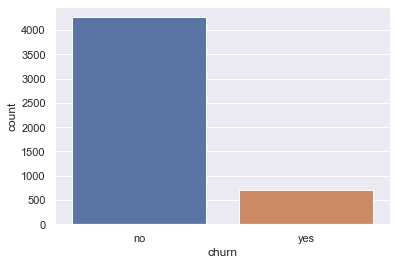

In [13]:
sn.set(rc={'figure.figsize':(6,4)})
sn.countplot(r_data['churn'])

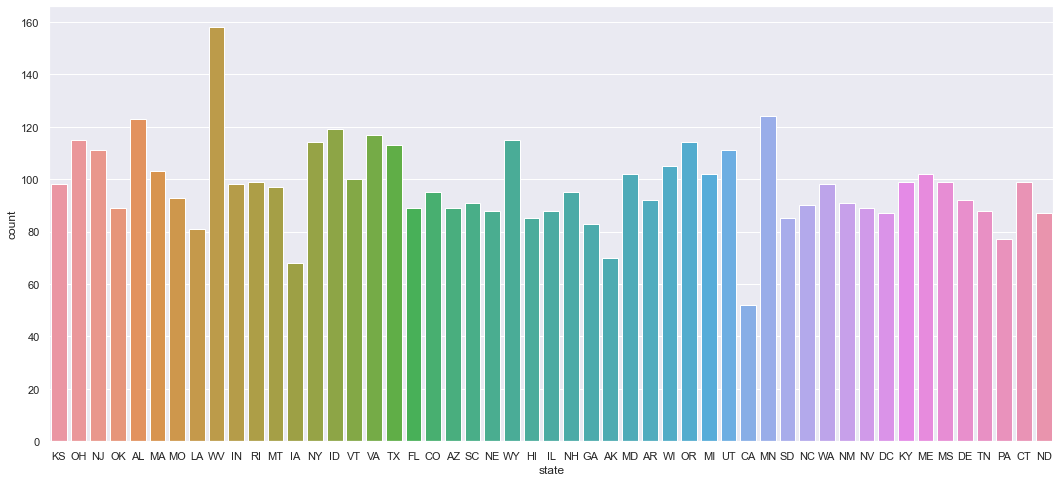

In [14]:
sn.set(rc={'figure.figsize':(18,8)})
sn.countplot(r_data['state'])
plt.show()

In [15]:
r_data['area.code'].value_counts()

area_code_415    2479
area_code_408    1249
area_code_510    1241
Name: area.code, dtype: int64

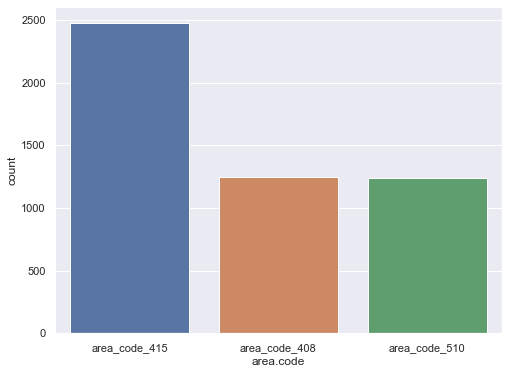

In [16]:
sn.set(rc={'figure.figsize':(8,6)})
sn.countplot(r_data['area.code'])
plt.show()

In [19]:
ch_data=r_data[r_data['churn']=='yes']
lc_data=r_data[r_data['churn']=='no']

In [20]:
ch_data

Unnamed: 0 state      area.code  account.length voice.plan  \
10            11    IN  area_code_415              65         no   
15            16    NY  area_code_415             161         no   
21            22    CO  area_code_408              77         no   
33            34    AZ  area_code_408              12         no   
41            42    MD  area_code_408             135        yes   
...          ...   ...            ...             ...        ...   
4959        4960    NM  area_code_408             137         no   
4980        4981    WA  area_code_408              73         no   
4990        4991    ND  area_code_510             140         no   
4991        4992    AZ  area_code_510              97         no   
4996        4997    WV  area_code_415             152         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
10                 0        no       12.7           6         3.43  ...   
15                 0        no        5.4           9         1.46  ...   
21                 0        no        5.7           6         1.54  ...   
33                 0        no       11.8           3         3.19  ...   
41                41       yes       14.6          15         3.94  ...   
...              ...       ...        ...         ...          ...  ...   
4959               0       yes       10.6           2         2.86  ...   
4980               0        no       12.3           2         3.32  ...   
4990               0        no        7.5           6         2.03  ...   
4991               0        no        8.8           5         2.38  ...   
4996               0        no       14.7           2         3.97  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
10          137       21.95     228.5         83       19.42       208.8   
15           67       56.59     317.8         97       27.01       160.6   
21           89       10.61     169.9        121       14.44       209.6   
33          118       42.43     252.4        119       21.45       280.2   
41           85       29.43     203.9        107       17.33       122.2   
...         ...         ...       ...        ...         ...         ...   
4959        110       53.11     231.1         73       19.64       120.1   
4980        118       30.12     270.5         84       22.99       241.8   
4990        115       41.60     258.6        101       21.98       231.3   
4991         89       42.94     340.3         91       28.93       256.5   
4996         90       31.31     256.8         73       21.83       213.6   

      night.calls  night.charge  customer.calls  churn  
10            111          9.40               4    yes  
15            128          7.23               4    yes  
21             64          9.43               5    yes  
33             90         12.61               1    yes  
41             78          5.50               0    yes  
...           ...           ...             ...    ...  
4959           78          5.40               1    yes  
4980          112         10.88               3    yes  
4990          112         10.41               1    yes  
4991           67         11.54               1    yes  
4996          113          9.61               3    yes  

[705 rows x 21 columns]

In [21]:
lc_data

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4994        4995    NC  area_code_408              75         no   
4995        4996    HI  area_code_408              50        yes   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4994               0        no        6.9           7         1.86  ...   
4995              40        no        9.9           5         2.67  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
0           110       45.07     197.4         99       16.78       244.7   
1           123       27.47     195.5        103       16.62       254.4   
2           114       41.38     121.2        110       10.30       162.6   
3            71       50.90      61.9         88        5.26       196.9   
4           113       28.34     148.3        122       12.61       186.9   
...         ...         ...       ...        ...         ...         ...   
4994        101       29.02     193.1        126       16.41       129.1   
4995        127       40.07     223.0        126       18.96       297.5   
4997         89       23.90     172.8        128       14.69       212.4   
4998         67       32.10     171.7         92       14.59       224.4   
4999        102       22.00     267.1        104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4994          104          5.81               1     no  
4995          116         13.39               2     no  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[4264 rows x 21 columns]

In [22]:
print(" Max : ", max(lc_data['account.length']),"\n","Min : ", min(lc_data['account.length'] ))

 Max :  243 
 Min :  1


In [23]:
print(" Max : ", max(ch_data['account.length']),"\n","Min : ", min(ch_data['account.length'] ))

 Max :  225 
 Min :  1


In [24]:
lc_data[lc_data['account.length']==243]

Unnamed: 0 state      area.code  account.length voice.plan  \
817         818    UT  area_code_510             243         no   

     voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
817               0        no        6.6           6         1.78  ...   

     day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
817         92       16.24     163.7         63       13.91       264.2   

     night.calls  night.charge  customer.calls  churn  
817          118         11.89               2     no  

[1 rows x 21 columns]

In [25]:
ch_data[ch_data['account.length']==225]

Unnamed: 0 state      area.code  account.length voice.plan  \
1551        1552    MI  area_code_415             225         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
1551               0        no        8.7           3         2.35  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
1551        106       28.12     273.7        109       23.26       210.0   

      night.calls  night.charge  customer.calls  churn  
1551           93          9.45               0    yes  

[1 rows x 21 columns]

In [26]:
lc_data[lc_data['account.length']==1]

Unnamed: 0 state      area.code  account.length voice.plan  \
923          924    MS  area_code_415               1         no   
1409        1410    NJ  area_code_415               1        yes   
1490        1491    TN  area_code_415               1         no   
1838        1839    IA  area_code_408               1        yes   
2423        2424    SC  area_code_408               1         no   
2475        2476    AK  area_code_408               1         no   
2879        2880    SC  area_code_415               1        yes   
3848        3849    NM  area_code_510               1        yes   
4174        4175    RI  area_code_510               1         no   
4915        4916    OR  area_code_415               1         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
923                0        no       13.8           3         3.73  ...   
1409              30        no        8.4           2         2.27  ...   
1490               0        no        7.0           2         1.89  ...   
1838              26        no        8.1           9         2.19  ...   
2423               0        no        3.7           2         1.00  ...   
2475               0        no        5.3           3         1.43  ...   
2879              26        no       10.0           2         2.70  ...   
3848              26        no        8.3           3         2.24  ...   
4174               0        no       14.1           3         3.81  ...   
4915               0        no       11.1           6         3.00  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
923         107       24.62     112.5         66        9.56       218.7   
1409         95       31.13     232.6        110       19.77       248.3   
1490        107       33.34     296.5         82       25.20       211.5   
1838        115       35.36     185.0        113       15.73       177.7   
2423        113       21.05     236.2         77       20.08        73.2   
2475         74       29.78     151.7         79       12.89       230.5   
2879         68       24.92     172.8         67       14.69       173.8   
3848         84       11.85     250.4         79       21.28       230.2   
4174        114       41.06     195.2         94       16.59       201.6   
4915         81       33.15     266.2        123       22.63       213.9   

      night.calls  night.charge  customer.calls  churn  
923            79          9.84               1     no  
1409          110         11.17               0     no  
1490           91          9.52               1     no  
1838          144          8.00               1     no  
2423           81          3.29               0     no  
2475          109         10.37               1     no  
2879          113          7.82               1     no  
3848          122         10.36               2     no  
4174           93          9.07               3     no  
4915          132          9.63               0     no  

[10 rows x 21 columns]

In [27]:
ch_data[ch_data['account.length']==1]

Unnamed: 0 state      area.code  account.length voice.plan  \
2960        2961    TX  area_code_415               1         no   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
2960               0        no       10.0           3          2.7  ...   

      day.calls  day.charge  eve.mins  eve.calls  eve.charge  night.mins  \
2960        106       30.96     134.9        106       11.47       152.3   

      night.calls  night.charge  customer.calls  churn  
2960           75          6.85               5    yes  

[1 rows x 21 columns]

In [28]:
lc_data.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  4264.000000     4264.000000     4264.000000  4264.000000  4264.000000   
mean   2504.679878       99.862805        8.297842    10.194536     4.479597   
std    1446.499764       39.731632       13.810807     2.750810     2.440770   
min       1.000000        1.000000        0.000000     0.000000     0.000000   
25%    1238.750000       73.000000        0.000000     8.500000     3.000000   
50%    2504.500000       99.000000        0.000000    10.300000     4.000000   
75%    3763.250000      127.000000       20.000000    12.000000     6.000000   
max    5000.000000      243.000000       52.000000    19.700000    19.000000   

       intl.charge     day.mins    day.calls   day.charge     eve.mins  \
count  4264.000000  4264.000000  4264.000000  4264.000000  4264.000000   
mean      2.753046   175.746177    99.892355    29.877425   198.786046   
std       0.742657    49.646482    19.678876     8.439833    50.142009   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   142.900000    87.000000    24.290000   164.500000   
50%       2.780000   178.000000   100.000000    30.260000   199.600000   
75%       3.240000   210.700000   113.000000    35.820000   232.300000   
max       5.320000   315.600000   163.000000    53.650000   361.800000   

         eve.calls   eve.charge   night.mins  night.calls  night.charge  \
count  4264.000000  4264.000000  4264.000000  4264.000000   4264.000000   
mean    100.219512    16.897045   199.500188   100.009146      8.977622   
std      19.866978     4.262066    50.599804    19.960474      2.276995   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%      87.000000    13.980000   166.000000    87.000000      7.470000   
50%     101.000000    16.970000   199.100000   100.000000      8.960000   
75%     113.000000    19.750000   233.325000   113.000000     10.500000   
max     170.000000    30.750000   395.000000   175.000000     17.770000   

       customer.calls  
count     4264.000000  
mean         1.458490  
std          1.164477  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          8.000000

In [29]:
ch_data.describe()

Unnamed: 0  account.length  voice.messages   intl.mins  intl.calls  \
count   705.000000      705.000000      705.000000  705.000000  705.000000   
mean   2531.768794      102.286525        4.470922   10.685532    4.151773   
std    1399.085337       39.440226       11.280618    2.793873    2.553618   
min      11.000000        1.000000        0.000000    0.000000    0.000000   
25%    1377.000000       76.000000        0.000000    8.800000    2.000000   
50%    2568.000000      102.000000        0.000000   10.600000    4.000000   
75%    3682.000000      126.000000        0.000000   12.800000    5.000000   
max    4997.000000      225.000000       48.000000   20.000000   20.000000   

       intl.charge    day.mins   day.calls  day.charge    eve.mins  \
count   705.000000  705.000000  705.000000  705.000000  705.000000   
mean      2.885589  207.886099  100.805674   35.341064  211.693617   
std       0.754249   68.647123   20.758021   11.670205   51.623121   
min       0.000000    0.000000    0.000000    0.000000   70.900000   
25%       2.380000  153.400000   88.000000   26.080000  175.800000   
50%       2.860000  215.900000  101.000000   36.700000  211.000000   
75%       3.460000  266.600000  115.000000   45.320000  249.300000   
max       5.400000  351.500000  165.000000   59.760000  363.700000   

        eve.calls  eve.charge  night.mins  night.calls  night.charge  \
count  705.000000  705.000000  705.000000   705.000000    705.000000   
mean    99.904965   17.994099  206.086667    99.624113      9.273986   
std     19.642133    4.387902   49.755075    19.961162      2.239022   
min     48.000000    6.030000   47.400000    42.000000      2.130000   
25%     86.000000   14.940000  171.700000    85.000000      7.730000   
50%     99.000000   17.940000  206.300000   100.000000      9.280000   
75%    114.000000   21.190000  241.000000   114.000000     10.850000   
max    168.000000   30.910000  381.600000   158.000000     17.170000   

       customer.calls  
count      705.000000  
mean         2.258156  
std          1.817300  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          4.000000  
max          9.000000

In [30]:
lc_usage={'Call_Type':['lc_day_mins','lc_eve_mins','lc_night_mins'],
      'Duration(mins)':[lc_data['day.mins'].mean(),lc_data['eve.mins'].mean(),lc_data['night.mins'].mean()]}
lc_usage=pd.DataFrame(lc_usage)
lc_usage

Call_Type  Duration(mins)
0    lc_day_mins      175.746177
1    lc_eve_mins      198.786046
2  lc_night_mins      199.500188

In [31]:
ch_usage={'Call_Type':['ch_day_mins','ch_eve_mins','ch_night_mins'],
      'Duration(mins)':[ch_data['day.mins'].mean(),ch_data['eve.mins'].mean(),ch_data['night.mins'].mean()]}
ch_usage=pd.DataFrame(ch_usage)
ch_usage

Call_Type  Duration(mins)
0    ch_day_mins      207.886099
1    ch_eve_mins      211.693617
2  ch_night_mins      206.086667

In [93]:
tt_lc_usage=(lc_data['eve.mins'].sum()+lc_data['eve.mins'].sum()+lc_data['night.mins'].sum())/(len(lc_data))
tt_ch_usage=(ch_data['eve.mins'].sum()+ch_data['eve.mins'].sum()+ch_data['night.mins'].sum())/(len(ch_data))
tt_usage={'Cust_type':['Loyal_Cust','Churn_Cust'],'Duration(mins):':[tt_ch_usage,tt_lc_usage]}
tt_usage=pd.DataFrame(tt_usage)
tt_usage

Cust_type  Duration(mins):
0  Loyal_Cust       629.473901
1  Churn_Cust       597.072280

<BarContainer object of 2 artists>

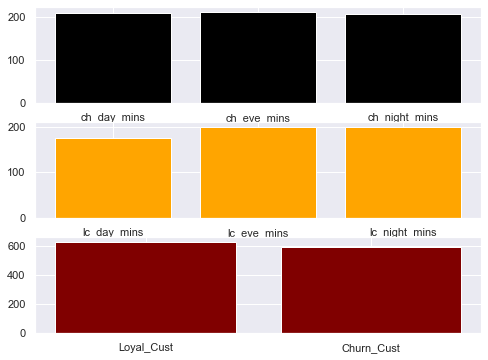

In [94]:
plt.subplot(3,1,1)
plt.bar(x=ch_usage['Call_Type'],height=ch_usage['Duration(mins)'],color='black')
plt.subplot(3,1,2)
plt.bar(x=lc_usage['Call_Type'],height=lc_usage['Duration(mins)'],color='orange')
plt.subplot(3,1,3)
plt.bar(x=tt_usage['Cust_type'],height=tt_usage['Duration(mins):'],color='Maroon')

In [95]:
lc_calls={'Call_Type':['lc_day_calls','lc_eve_calls','lc_night_calls'],
      'Calls(mean)':[lc_data['day.calls'].mean(),lc_data['eve.calls'].mean(),lc_data['night.calls'].mean()]}
lc_calls=pd.DataFrame(lc_calls)
lc_calls

Call_Type  Calls(mean)
0    lc_day_calls    99.892355
1    lc_eve_calls   100.219512
2  lc_night_calls   100.009146

In [96]:
ch_calls={'Call_Type':['ch_day_calls','ch_eve_calls','ch_night_calls'],
      'Calls(mean)':[ch_data['day.calls'].mean(),ch_data['eve.calls'].mean(),ch_data['night.calls'].mean()]}
ch_calls=pd.DataFrame(ch_calls)
ch_calls

Call_Type  Calls(mean)
0    ch_day_calls   100.805674
1    ch_eve_calls    99.904965
2  ch_night_calls    99.624113

In [97]:
tt_lc_calls=(lc_data['eve.calls'].sum()+lc_data['eve.calls'].sum()+lc_data['night.calls'].sum())/(len(lc_data))
tt_ch_calls=(ch_data['eve.calls'].sum()+ch_data['eve.calls'].sum()+ch_data['night.calls'].sum())/(len(ch_data))
tt_calls={'Cust_type':['Loyal_Cust','Churn_Cust'],'Calls(mean)':[tt_lc_calls,tt_ch_calls]}
tt_calls=pd.DataFrame(tt_calls)
tt_calls

Cust_type  Calls(mean)
0  Loyal_Cust   300.448171
1  Churn_Cust   299.434043

<BarContainer object of 2 artists>

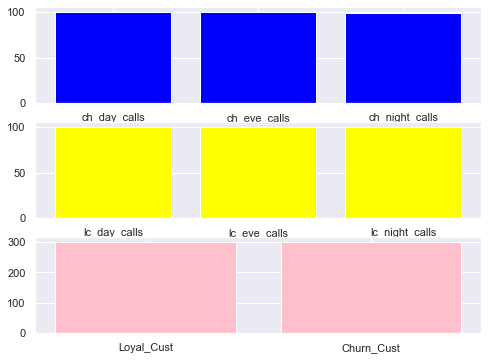

In [98]:
plt.subplot(3,1,1)
plt.bar(x=ch_calls['Call_Type'],height=ch_calls['Calls(mean)'],color='blue')
plt.subplot(3,1,2)
plt.bar(x=lc_calls['Call_Type'],height=lc_calls['Calls(mean)'],color='yellow')
plt.subplot(3,1,3)
plt.bar(x=tt_calls['Cust_type'],height=tt_calls['Calls(mean)'],color='pink')

In [99]:
lc_charge={'Charge_Type':['lc_day_charge','lc_eve_charge','lc_night_charge'],
      'Charges(mean)':[lc_data['day.charge'].mean(),lc_data['eve.charge'].mean(),lc_data['night.charge'].mean()]}
lc_charge=pd.DataFrame(lc_charge)
lc_charge

Charge_Type  Charges(mean)
0    lc_day_charge      29.877425
1    lc_eve_charge      16.897045
2  lc_night_charge       8.977622

In [100]:
ch_charge={'Charge_Type':['ch_day_calls','ch_eve_calls','ch_night_calls'],
      'Charges(mean)':[ch_data['day.charge'].mean(),ch_data['eve.charge'].mean(),ch_data['night.charge'].mean()]}
ch_charge=pd.DataFrame(ch_charge)
ch_charge

Charge_Type  Charges(mean)
0    ch_day_calls      35.341064
1    ch_eve_calls      17.994099
2  ch_night_calls       9.273986

In [101]:
tt_lc_charge=(lc_data['eve.charge'].sum()+lc_data['eve.charge'].sum()+lc_data['night.charge'].sum())/len(lc_data)
tt_ch_charge=(ch_data['eve.charge'].sum()+ch_data['eve.charge'].sum()+ch_data['night.charge'].sum())/len(ch_data)
tt_charge={'Cust_type':['Loyal_Cust','Churn_Cust'],'Charges(mean)':[tt_lc_charge,tt_ch_charge]}
tt_charge=pd.DataFrame(tt_charge)
tt_charge

Cust_type  Charges(mean)
0  Loyal_Cust      42.771712
1  Churn_Cust      45.262184

<BarContainer object of 2 artists>

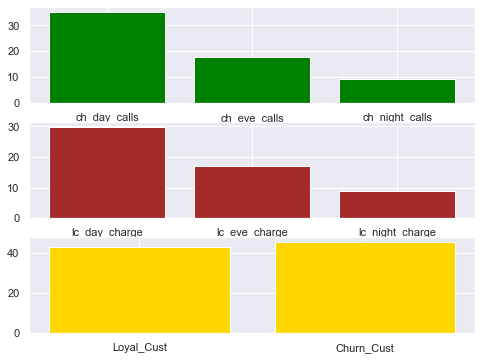

In [106]:
plt.subplot(3,1,1)
plt.bar(x=ch_charge['Charge_Type'],height=ch_charge['Charges(mean)'],color='Green')
plt.subplot(3,1,2)
plt.bar(x=lc_charge['Charge_Type'],height=lc_charge['Charges(mean)'],color='brown')
plt.subplot(3,1,3)
plt.bar(x=tt_charge['Cust_type'],height=tt_charge['Charges(mean)'],color='gold')

In [108]:
intl_Usage={'Varible':['Intl_Calls','Intl_Mins','Intl_charges'],
           'Ch_cust':[ch_data['intl.calls'].mean(),ch_data['intl.mins'].mean(),ch_data['intl.charge'].mean()],
           'Ly_cust':[lc_data['intl.calls'].mean(),lc_data['intl.mins'].mean(),lc_data['intl.charge'].mean()]}
intl_Usage=pd.DataFrame(intl_Usage)
intl_Usage

Varible    Ch_cust    Ly_cust
0    Intl_Calls   4.151773   4.479597
1     Intl_Mins  10.685532  10.194536
2  Intl_charges   2.885589   2.753046

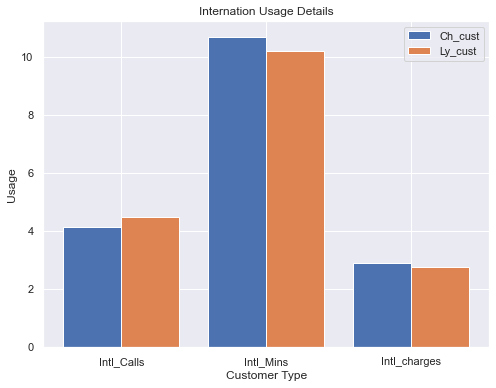

In [109]:
X_axis = np.arange(len(intl_Usage))
  
plt.bar(X_axis - 0.2, intl_Usage['Ch_cust'], 0.4, label = 'Ch_cust')
plt.bar(X_axis + 0.2, intl_Usage['Ly_cust'], 0.4, label = 'Ly_cust')
  
plt.xticks(X_axis, intl_Usage['Varible'])
plt.xlabel("Customer Type")
plt.ylabel("Usage")
plt.title("Internation Usage Details")
plt.legend()
plt.show()